In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reding an external file with data

The .csv file "weight-height.csv" contains a biggish data set with the height and length of some population (propaply American, becaue of the units used).

We will import the data from this file into a "Pandas data frame":

In [2]:
df = pd.read_csv("weight-height.csv",index_col=None)

Pandas is a library of functions that help us handle with tabular data sets like this. Essentially, a Pandas data frame is like a matrix (2d Numpy array), but unlike Numpy arrays which only allow numerical data, a data frame can contain columns with different types of data. Let's look at the one we just imported:  

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


As you can see, the data frame has 10000 observations on three different variables ($n=10000$, $p=3$). The first variable is non-numerical.

A neat feature of data frames is that we can assign labels to the columns (in this example "Gender", "Height" and "Weight"), and use these labels to access individual columns, e.g.:

In [4]:
df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

Let's add two columns that are easier for us to interpret :)

In [5]:
df['Height_cm']=df['Height']*2.54
df['Weight_kg']=df['Weight']/2.20462

In [6]:
df

,Gender,Height,Weight,Height_cm,Weight_kg
0,Male,73.847017,241.893563,187.571423,109.721205
1,Male,68.781904,162.310473,174.706036,73.622879
2,Male,74.110105,212.740856,188.239668,96.497744
3,Male,71.730978,220.042470,182.196685,99.809704
4,Male,69.881796,206.349801,177.499761,93.598806
...,...,...,...,...,...
9995,Female,66.172652,136.777454,168.078536,62.041283
9996,Female,67.067155,170.867906,170.350573,77.504471
9997,Female,63.867992,128.475319,162.224700,58.275494
9998,Female,69.034243,163.852461,175.346978,74.322315


Let's extract the numerical columns we're interested in. That would be the 4th and 5th column (index 3 and 4).

#### How about we plot the data points:

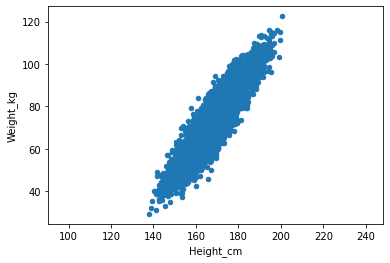

In [7]:
df.plot.scatter('Height_cm','Weight_kg')
plt.axis('Equal')
plt.show()

#### Let's also look at the correlation coefficients. 

For a Pandas dataframe the correlation coefficient matrix $R$ can be easily calculated. Let's calculate the correlation matrix for the `Height_cm` and `Weight_cm` columns:

In [8]:
X = df.loc[:,['Height_cm','Weight_kg']] # This extracts the given columns from the dataframe
                                        # and assigns them to a new datafram called X
S = X.cov()                             # Covariance matrix for X
R = X.corr()                            # Correlation matrix for X
print(S,'\n')
print(R)

            Height_cm   Weight_kg
Height_cm   95.506084  131.621934
Weight_kg  131.621934  212.114764 

           Height_cm  Weight_kg
Height_cm   1.000000   0.924756
Weight_kg   0.924756   1.000000


As the plot above (and common sense) suggests, the height and weight of a person are highly correlated ($r\approx 0.92$).

We see that the Height variance is about 95 (standard deviation $\approx 9.78$) while the Weight variance is about 212 (standard deviation $\approx 14.56$).

## Calculating principal components

First, let's centralize!
The `X.mean()` calculates the mean for each column of the dataframe `X` so we can subtract that.

In [9]:
Y = X-X.mean()
print(Y)

      Height_cm  Weight_kg
0     18.997821  36.493004
1      6.132434   0.394678
2     19.666066  23.269542
3     13.623083  26.581503
4      8.926160  20.370605
...         ...        ...
9995  -0.495065 -11.186918
9996   1.776971   4.276269
9997  -6.348902 -14.952708
9998   6.773376   1.094114
9999 -11.235217 -21.677774

[10000 rows x 2 columns]


The lecture tells us that we need the eigenvalues and eigenvectors of the covariance matrix `S`.

In [19]:
l, Q = np.linalg.eig(S)
# The following code sorts the eigenvalues by decreasing size and rearranges the columns of Q accordingly:
idx = l.argsort()[::-1]
l = l[idx]
Q = Q[:,idx]
print(Q, l)

[[-0.54543052 -0.83815604]
 [-0.83815604  0.54543052]] [297.76781194   9.85303641]


Let's take a look:

In [11]:
print(l)
print(Q)

[297.76781194   9.85303641]
[[-0.54543052 -0.83815604]
 [-0.83815604  0.54543052]]


Let's check that `Q` is an orthogonal matrix:

In [12]:
Q.transpose() @ Q

array([[1.00000000e+00, 6.56358291e-18],
       [6.56358291e-18, 1.00000000e+00]])

The lecture tells us that the matrix
$$Y'=YQ$$
will contain our new variables (our principal components).

In [13]:
Yp = Y @ Q
Yp.columns=['Pc. 1','Pc. 2']  # We're also giving appropriate names to the columns.

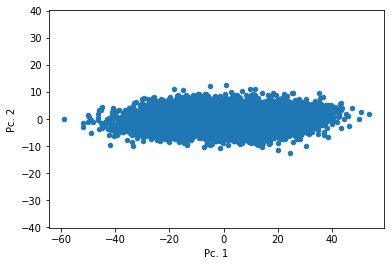

In [14]:
Yp.plot.scatter('Pc. 1','Pc. 2')
plt.axis('Equal')
plt.show()

Note that the eigenvalues are the same as the variances of the principal components (diagonal entries of $S'$):

In [15]:
print(l)
print(Yp.cov())

[297.76781194   9.85303641]
              Pc. 1         Pc. 2
Pc. 1  2.977678e+02 -2.575264e-15
Pc. 2 -2.575264e-15  9.853036e+00


Note that the total variance (sum of diagonal entries of covariance matrix) is the same for the original variables as for the principal components.

In [16]:
print(np.trace(Y.cov()))
print(np.trace(Yp.cov()))

307.62084835063365
307.6208483506334


But for the principal components, most of the variance is found in the first principal component.

In [17]:
l

array([297.76781194,   9.85303641])

In [18]:
l[0]/sum(l)

0.9679701929753399

More than 96%